# Coursera Capstone Project 

# Final Project - GAGAN BHATIA 

## Coursera Capstone - REPORT CONTENT

- Introduction Section : Discussion of the business problem and the interested audience in this project.
- Data Section : Description of the data that will be used to solve the problem and the sources.
- Methodology section : Discussion and description of exploratory data analysis carried out, any inferential statistical testing performed, and if any machine learnings were used establishing the strategy and purposes.
- Results section : Discussion of the results.
- Discussion section : Elaboration and discussion on any observations noted and any recommendations suggested based on the results.
- Conclusion section : Report Conclusion.

# Introduction

I am a data scientist currently residing in Downtown Vancouver. I currently live within walking distance to Downtown Skytrain station therefore I have access to good public transportation to work. Likewise, I enjoy many ammenities in the neighborhood , such as international cousine restaurants, cafes, food shops and entertainment. I have been offered a great opportunity to work in Manhattan, NY. Although, I am very excited about it, I am a bit stress toward the process to secure a comparable place to live in Manhattan. Of course, there are alternatives to achieve the answer using available Google and Social media tools, but it rewarding doing it myself with learned tools.

The challenge to resolve is being able to find a rental apartment unit in Manhattan NY that offers similar characteristics and benefits to my current situation. Therefore, in order to set a basis for comparison, I want to find a renta unit subject to the following conditions:

Apartment with min 2 bedrooms with monthly rent not to exceed US$7000/month

Unit located within walking distance (<=1.0 mile, 1.6 km) from a subway metro station in Manhattan

Area with ammenities and venues similar to the ones described for current location 


I believe this is a relevant project for a person or entity considering moving to a major city in Europe, US or Asia, since the approach and methodologies used here are applicable in all cases. The use of FourSquare data and mapping techniques combined with data analysis will help resolve the key questions arisen. Lastly, this project is a good practical case toward the development of Data Science skills.

# Data

### Description of Data used

I Currently reside in the neighborhood of UBC in Vancouver. I use Foursquare to identify the venues around the area of residence which are then shown in the Singapore map shown in methodology and execution in section 3.0 . It serves as a reference for comparison with the desired future location in Manhattan NY

In order to make a good choice of a similar apartment in Manhattan NY, the following data is required: List/Information on neighborhoods form Manhattan with their Geodata ( latitud and longitud. List/Information about the subway metro stations in Manhattan with geodata. Listed apartments for rent in Manhattan area with descriptions ( how many beds, price, location, address) Venues and ammenities in the Manhattan neighborhoods (e.g. top 10) 2.3 sources and manipulation The list of Manhattan neighborhoods is worked out during LAb exercise during the course. A csv file was created which will be read in order to create a dataframe and its mapping. The csv file 'mh_neigh_data.csv' has the following below data structure. The file will be directly read to the Jupiter Notebook for convenience and space savings. The clustering of neighborhoods and mapping will be shown however. An algorythm was used to determine the geodata from Nominatim . The actual algorythm coding may be shown in 'markdown' mode becasues it takes time to run.

#### The following data is required to answer the issues of the problem:

- List of Boroughs and neighborhoods of Manhattan with their geodata (latitud and longitud)
- List of Subway metro stations in Manhattan with their address location
- List of apartments for rent in Manhattan area with their addresses and price
- Preferably, a list of apartment for rent with additional information, such as price, address, area, # of beds, etc
- Venues for each Manhattan neighborhood ( than can be clustered)
- Venues for subway metro stations, as needed

#### The data will be used as follows:

- Use Foursquare and geopy data to map top 10 venues for all Manhattan neighborhoods and clustered in groups ( as per Course LAB)
- Use foursquare and geopy data to map the location of subway metro stations , separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately
- Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations.
create a map that depicts, for instance, the average rental price per square ft, around a radious of 1.0 mile (1.6 km) around each subway station - or a similar metrics. I will be able to quickly point to the popups to know the relative price per subway area.
- Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim.
- Data will be searched in open data sources if available, from real estate sites if open to reading, libraries or other government agencies such as Metro New York MTA, etc.

#### The procesing of these DATA will allow to answer the key questions to make a decision:

- what is the cost of rent (per square ft) around a mile radius from each subway metro station?
- what is the area of Manhattan with best rental pricing that meets criteria established?
- What is the distance from work place ( Park Ave and 53 rd St) and the tentative future home?
- What are the venues of the two best places to live? How the prices compare?
- How venues distribute among Manhattan neighborhoods and around metro stations?
- Are there tradeoffs between size and price and location?
- Any other interesting statistical data findings of the real estate and overall data.
- Are there any Indian Resturants Close by to the place 


# The CODE is as follows

In [1]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
address = '2205,Lower Mall, Vancouver, BC, Canada'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Vancouver home are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  from ipykernel import kernelapp as app


The geograpical coordinate of Vancouver home are 49.2665021, -123.2590757.


In [46]:
CLIENT_ID = 'P0Q0Q0YH0ZJBN1HHLXWXS0KKFYSGSABBCQLNMAAEHDRBWNIJ' # your Foursquare ID
CLIENT_SECRET = '3OZF4USJAJAJF1VFOEJ212UR0SHWFU2BLQL5I0U00XXNPE0A' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:


In [16]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 2500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

In [17]:
results = requests.get(url).json()

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
venues = results['response']['groups'][0]['items']
    
VANnearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
VANnearby_venues =VANnearby_venues.loc[:, filtered_columns]

# filter the category for each row
VANnearby_venues['venue.categories'] = VANnearby_venues.apply(get_category_type, axis=1)

# clean columns
VANnearby_venues.columns = [col.split(".")[-1] for col in VANnearby_venues.columns]

VANnearby_venues.head(10)

,name,categories,lat,lng
0,UBC Museum of Anthropology,History Museum,49.269246,-123.259563
1,Chan Centre for the Performing Arts,Concert Hall,49.269538,-123.255597
2,UBC Rose Garden,Garden,49.269165,-123.256381
3,Wreck Beach,Beach,49.261041,-123.261623
4,Mercante,Italian Restaurant,49.263765,-123.255148
5,Koerner's Pub,Pub,49.268790,-123.258201
6,Beaty Biodiversity Museum,Science Museum,49.263347,-123.251000
7,Loafe Café,Coffee Shop,49.265903,-123.250335
8,Great Dane Coffee,Café,49.270049,-123.250737
9,Cecil Green Park House,Scenic Lookout,49.271348,-123.257754


In [20]:
map_nd = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, label in zip(VANnearby_venues['lat'], VANnearby_venues['lng'], VANnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=4,
        radius=10,
        popup=label,
        color='red',
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_nd)  
    
map_nd

In [21]:
mh_neigh_df=pd.read_csv('https://raw.githubusercontent.com/gagan3012/ibm-data-science/master/mh_neigh_data.csv')
mh_neigh_df.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,2
1,Manhattan,Chinatown,40.715618,-73.994279,2
2,Manhattan,Washington Heights,40.851903,-73.936900,4
3,Manhattan,Inwood,40.867684,-73.921210,3
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0


In [22]:
mh_df=pd.read_csv('https://raw.githubusercontent.com/gagan3012/ibm-data-science/master/mh_data.csv')
mh_df.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio


In [23]:
latitude= 40.7308619
longitude= -73.9871558 

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mh_neigh_df['Latitude'], mh_neigh_df['Longitude'], mh_neigh_df['Neighborhood'], mh_neigh_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(mh_df['Latitude'], mh_df['Longitude'], mh_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

# Coming to our solution 

In [28]:
## kk is the cluster number to explore
kk = 3
mh_df.loc[mh_df['Cluster Labels'] == kk, mh_df.columns[[1] + list(range(5, mh_df.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


In [29]:
mh_rent=pd.read_csv('https://raw.githubusercontent.com/gagan3012/ibm-data-science/master/mh_rent.csv')
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [30]:
mh_subway=pd.read_csv('https://raw.githubusercontent.com/gagan3012/ibm-data-science/master/mh_subway.csv')
mh_subway.head()

,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525


In [31]:
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mh_subway['lat'], mh_subway['long'],  mh_subway['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='green',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_manhattan_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_manhattan_rent

In [32]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ', '+mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mh_subway['lat'], mh_subway['long'],  mh_subway['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mh_df['Latitude'], mh_df['Longitude'], mh_df['Neighborhood'], mh_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mh_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_one)

map_mh_one

In [33]:
## kk is the cluster number to explore
kk = 0
mh_df.loc[mh_df['Cluster Labels'] == kk, mh_df.columns[[1] + list(range(5, mh_df.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Hamilton Heights,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio
8,Upper East Side,Italian Restaurant,Exhibit,Art Gallery,Bakery,Coffee Shop,French Restaurant,Cocktail Bar,Juice Bar,Hotel,Boutique


In [39]:
## kk is the cluster number to explore
kk=3
mh_df.loc[mh_df['Cluster Labels'] == kk, mh_df.columns[[1] + list(range(5, mh_df.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


In [40]:
## kk is the cluster number to explore
kk=2
mh_df.loc[mh_df['Cluster Labels'] == kk, mh_df.columns[[1] + list(range(5, mh_df.shape[1]))]]
#this is the first one

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


In [41]:
## kk is the cluster number to explore
kk=3
mh_df.loc[mh_df['Cluster Labels'] == kk, mh_df.columns[[1] + list(range(5, mh_df.shape[1]))]]
## second one 

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


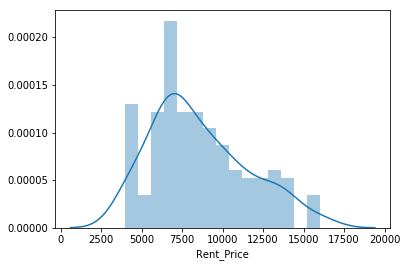

In [42]:
import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=15)

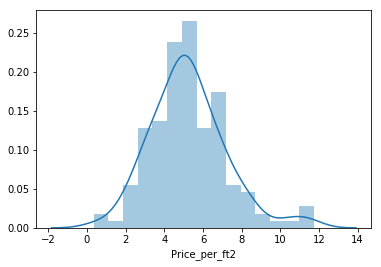

In [44]:
import seaborn as sns
sns.distplot(mh_rent['Price_per_ft2'],bins=15)

In [53]:
# search for Cafeteria
search_query = 'Indian Restaurant'
radius = 10000

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [54]:
cresults = requests.get(url).json()

In [55]:
venues = cresults['response']['venues']

# tranform venues into a dataframe
IR_dataframe = json_normalize(venues)
IR_dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",NaN,NaN,NaN,NaN,NaN,NaN,False,4116be80f964a520f90b1fe3,93 1st Ave,US,New York,United States,btwn 5th & 6th St,516,"[93 1st Ave (btwn 5th & 6th St), New York, NY ...","[{'label': 'display', 'lat': 40.72627299004598...",40.726273,-73.986273,NaN,10003,NY,Panna II Garden Indian Restaurant,v-1580116708,149505937
1,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",NaN,NaN,NaN,NaN,NaN,NaN,False,4d0e6159bf0c8eec2188282a,369 Broome St,US,New York,United States,NaN,1388,"[369 Broome St, New York, NY 10013, United Sta...","[{'label': 'display', 'lat': 40.72027216898879...",40.720272,-73.995855,NaN,10013,NY,Indian Restaurant,v-1580116708,NaN
2,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",270841,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/joy-curry--tando...,False,5023ff6ce4b06e8a945ea64a,32 W 39th St,US,New York,United States,6th Ave,2410,"[32 W 39th St (6th Ave), New York, NY 10018, U...","[{'label': 'display', 'lat': 40.75238509631068...",40.752385,-73.984045,NaN,10018,NY,Joy Curry & Tandoor Indian Restaurant,v-1580116708,93547141
3,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",73233,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/46th-street-mina...,False,4ab3bc6af964a520386e20e3,138 W 46th St,US,New York,United States,btwn 6th Ave & 7th Ave,3055,"[138 W 46th St (btwn 6th Ave & 7th Ave), New Y...","[{'label': 'display', 'lat': 40.75819904648018...",40.758199,-73.983938,NaN,10036,NY,Minar Indian Restaurant,v-1580116708,NaN
4,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",266126,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/asya--46-henry-s...,False,506a2625498e3c434686abbc,46 Henry St,US,Brooklyn,United States,NaN,3504,"[46 Henry St, Brooklyn, NY 11201, United States]","[{'label': 'display', 'lat': 40.699607, 'lng':...",40.699607,-73.992110,NaN,11201,NY,Asya Indian Restaurant,v-1580116708,94617937


In [56]:
IR_clean_columns = ['name', 'categories'] + [col for col in IR_dataframe.columns if col.startswith('location.')]+ ['id']
clean_IR_dataframe = IR_dataframe.loc[:,IR_clean_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list4 = row['categories']
    except:
        categories_list4 = row['venue.categories']
        
    if len(categories_list4) == 0:
        return None
    else:
        return categories_list4[0]['name']

# filter the category for each row
clean_IR_dataframe['categories'] = clean_IR_dataframe.apply(get_category_type, axis=1)

# clean column names by keeping only last term
clean_IR_dataframe.columns = [column.split('.')[-1] for column in clean_IR_dataframe.columns]

clean_IR_dataframe.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Panna II Garden Indian Restaurant,Indian Restaurant,93 1st Ave,US,New York,United States,btwn 5th & 6th St,516,"[93 1st Ave (btwn 5th & 6th St), New York, NY ...","[{'label': 'display', 'lat': 40.72627299004598...",40.726273,-73.986273,NaN,10003,NY,4116be80f964a520f90b1fe3
1,Indian Restaurant,Indian Restaurant,369 Broome St,US,New York,United States,NaN,1388,"[369 Broome St, New York, NY 10013, United Sta...","[{'label': 'display', 'lat': 40.72027216898879...",40.720272,-73.995855,NaN,10013,NY,4d0e6159bf0c8eec2188282a
2,Joy Curry & Tandoor Indian Restaurant,Indian Restaurant,32 W 39th St,US,New York,United States,6th Ave,2410,"[32 W 39th St (6th Ave), New York, NY 10018, U...","[{'label': 'display', 'lat': 40.75238509631068...",40.752385,-73.984045,NaN,10018,NY,5023ff6ce4b06e8a945ea64a
3,Minar Indian Restaurant,Indian Restaurant,138 W 46th St,US,New York,United States,btwn 6th Ave & 7th Ave,3055,"[138 W 46th St (btwn 6th Ave & 7th Ave), New Y...","[{'label': 'display', 'lat': 40.75819904648018...",40.758199,-73.983938,NaN,10036,NY,4ab3bc6af964a520386e20e3
4,Asya Indian Restaurant,Indian Restaurant,46 Henry St,US,Brooklyn,United States,NaN,3504,"[46 Henry St, Brooklyn, NY 11201, United States]","[{'label': 'display', 'lat': 40.699607, 'lng':...",40.699607,-73.992110,NaN,11201,NY,506a2625498e3c434686abbc


In [57]:
clean_IR_dataframe2= clean_IR_dataframe.drop(['cc', 'city', 'country', 'crossStreet', 'distance', 'formattedAddress',\
                                        'labeledLatLngs', 'id'], axis=1)
clean_IR_dataframe2

,name,categories,address,lat,lng,neighborhood,postalCode,state
0,Panna II Garden Indian Restaurant,Indian Restaurant,93 1st Ave,40.726273,-73.986273,NaN,10003,NY
1,Indian Restaurant,Indian Restaurant,369 Broome St,40.720272,-73.995855,NaN,10013,NY
2,Joy Curry & Tandoor Indian Restaurant,Indian Restaurant,32 W 39th St,40.752385,-73.984045,NaN,10018,NY
3,Minar Indian Restaurant,Indian Restaurant,138 W 46th St,40.758199,-73.983938,NaN,10036,NY
4,Asya Indian Restaurant,Indian Restaurant,46 Henry St,40.699607,-73.992110,NaN,11201,NY
5,Indian Restaurant,Food,338 9th Ave,40.750702,-73.998100,NaN,10001,NY
6,Bombay's Indian Restaurant,Indian Restaurant,60 Pearl St,40.703569,-74.011141,NaN,10004,NY
7,Angel Indian Restaurant,Indian Restaurant,74-14 37th Rd,40.747206,-73.890967,NaN,11372,NY
8,Aanchal Indian Restaurant,Indian Restaurant,45-12 23rd St,40.746591,-73.945466,NaN,11101,NY
9,Polash Indian restaurant,Indian Restaurant,2179 3rd Ave,40.799745,-73.938747,NaN,10035,NY


In [63]:
latitude= 40.7308619
longitude= -73.9871558

final_map = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ', '+mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(final_map) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mh_subway['lat'], mh_subway['long'],  mh_subway['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(final_map) 

#add markers for indian resturants in newyork
for lat, lng, label in zip(clean_IR_dataframe2['lat'], clean_IR_dataframe2['lng'],  clean_IR_dataframe2['name'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=4,
        radius=6,
        popup=label,
        color='green',
        fill_color='green',
        fill_opacity=2.5,
    ).add_to(final_map) 
# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mh_df['Latitude'], mh_df['Longitude'], mh_df['Neighborhood'], mh_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(final_map)

    # Adds tool to the top right
from folium.plugins import MeasureControl
final_map.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(final_map)

final_map

# Methodology

This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps.

The analysis and the stragegy:
The strategy is based on mapping the above described data in section 2.0, in order to facilitate the choice of at least two candidate places for rent. The choice is made based on the demands imposed : location near a subway, rental price, eating options nearby and similar venues to Vancouver. This visual approach and maps with popups labels allow quick identification of location, price and feature, thus making the selection very easy

The procesing of these DATA and its mapping will allow to answer the key questions to make a decision:

- what is the cost of available rental places that meet the demands?
- what is the cost of rent around a mile radius from each subway metro station?
- what is the area of Manhattan with best rental pricing that meets criteria established?
- What is the distance from work place ( Park Ave and 53 rd St) and the tentative future rental home?
- What are the venues of the two best places to live? How the prices compare?
- How venues distribute among Manhattan neighborhoods and around metro stations?
- Are there tradeoffs between size and price and location?
- Any other interesting statistical data findings of the real estate and overall data.
- What are the eating options nearby
- how close is it form the place 

# Results

### After examining, I have chosen two locations that meet the requirements which will assess to make a choice.
- Apartment 1: 305 East 63rd Street in the Sutton Place Neighborhood and near 'subway 59th Street' station, Cluster # 2 Monthly rent : 7500 Dollars with a Indian resturant nearby with good food options 

- Apartment 2: 19 Dutch Street in the Financial District Neighborhood and near 'Fulton Street Subway' station, Cluster # 3 Monthly rent : 6935 Dollars with a decent Italian resturant.

# Disscusion

After Examining the Data I have two perfect options which are perfect for the person shifting. It maybe noted that a lot of external factors like weather were not considered during this report. We also did not consider traffic and other disablites of a person. 

# Conlusion 

For a person who is planning to shift from any place to Manhattan I believe that this report will be sufficent to understand the city. I have compared rent, food options, distance from subway using clustering and found that in cluster #3 we had the best place to stay found

Thank you for taking the time to read, review and comment. I welcome all comments and suggestions. You can reach me at: email:gbhatia880@gmail.com¶